In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Parse the log data and create a DataFrame
data = []
with open('logs.txt', 'r') as file:
	for line in file:
		if 'time.busy=' in line:
			a = line.index("ThreadId") + 13
			b = line.index(" ", a)
			syscall = line[a:b]

			a = line.index("time.busy=", b) + 10
			b = line.index(" ", a) - 3
			busy_str = line[a:b]

			a = line.index("time.idle=", b) + 10
			b = line.find(" ", a)
			if b == -1: continue
			idle_str = line[a:b-3]

			time_busy = float(busy_str)
			time_idle = float(idle_str)

			# Convert time_idle from nanoseconds to microseconds
			# time_idle /= 1000

			data.append([syscall, time_busy, time_idle])

df = pd.DataFrame(data, columns=['Syscall', 'Time Busy (µs)', 'Time Idle (ns)'])

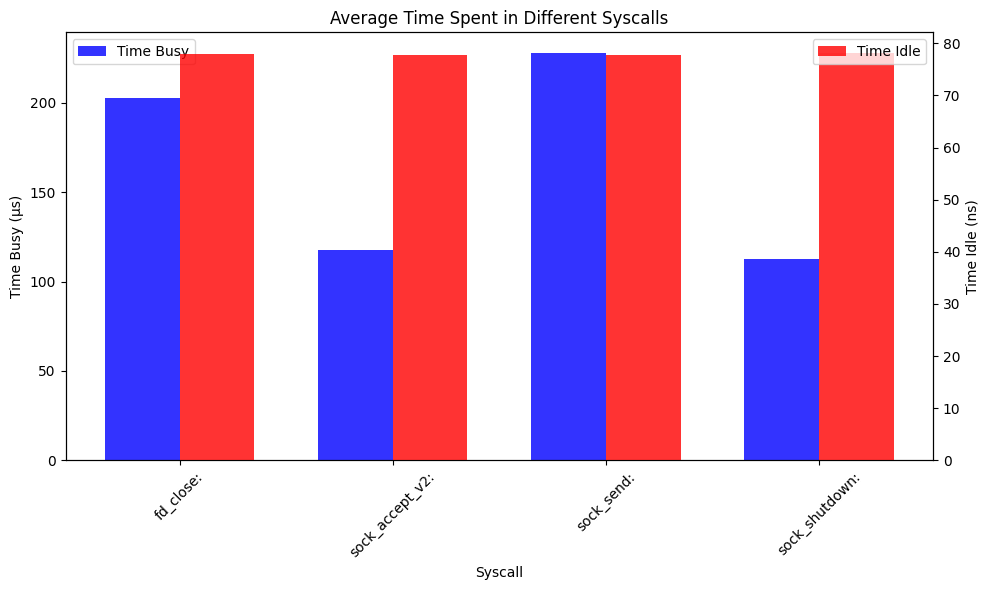

In [7]:
# Group by syscall and sum the time
grouped_data = df.groupby('Syscall').mean().reset_index()

# Create a clustered bar graph with two different scales
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a secondary y-axis

bar_width = 0.35
opacity = 0.8

index = np.arange(len(grouped_data['Syscall']))

ax1.bar(index - bar_width/2, grouped_data['Time Busy (µs)'], bar_width,
        alpha=opacity, color='b', label='Time Busy')
ax2.bar(index + bar_width/2, grouped_data['Time Idle (ns)'], bar_width,
        alpha=opacity, color='r', label='Time Idle')

ax1.set_xlabel('Syscall')
ax1.set_ylabel('Time Busy (µs)')
ax2.set_ylabel('Time Idle (ns)')
ax1.set_title('Average Time Spent in Different Syscalls')
ax1.set_xticks(index)
ax1.set_xticklabels(grouped_data['Syscall'], rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()